In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Test set Image Processing

In [9]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/DL/Colab_Data/archive/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


Loading Model


In [16]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/trained_model.h5')

In [17]:
!ls /content/

 drive	 sample_data  'Screenshot 2025-08-22 171608.png'


In [19]:
!ls /content/drive/MyDrive/DL/Colab_Data/

archive  archive.zip


In [20]:
!ls /content/drive/MyDrive/

 AI		    DL		       'Recorded Lecture video.xlsx'
'Colab Notebooks'  'Google AI Studio'   trained_model.h5


Visualising and Performing Prediction on Single image


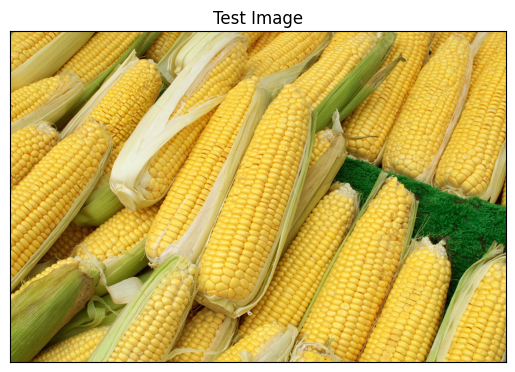

In [22]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/DL/Colab_Data/archive/validation/corn/Image_1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

Testing Model


In [23]:

image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


In [24]:
print(predictions)


[[0.00558836 0.03466617 0.00073758 0.02522946 0.07497322 0.0188465
  0.00119014 0.05547046 0.00706831 0.05603741 0.07064118 0.00626417
  0.02703372 0.0117162  0.02676062 0.04044817 0.03371861 0.0467412
  0.06664245 0.01480626 0.001918   0.00350543 0.00229343 0.0467234
  0.07949729 0.02863821 0.00017538 0.00427859 0.0260617  0.0482324
  0.07105069 0.04313622 0.00045702 0.00116389 0.00799255 0.01029558]]


In [25]:
# test_set.class_names
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

24


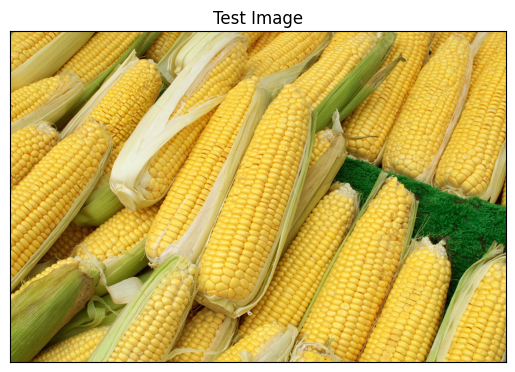

In [26]:

# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [27]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a peas
